# (1) Importing/Storing data

In [1]:
import wfdb
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
records = []
properties = []
annot = []
AnnSymb = []
AnnSamp = []
AnnRhythm = []
Rpeak_Samp = []
Rpeak_Symb = []


for f in glob.glob('C:/Users/masud/Skrivebord/Github_Bachelor_Project/wfdb-python/data/atrial_fibrillation_data/*.dat'): ##### change the path to own directory.       
                                                                                             ##### The rest should remin the same
                                                                                             ##### Useful function:
                                                                                             ##### print('Current directory is: {}'.format(os.getcwd()))
    sig, fields = wfdb.rdsamp(f[:-4], channels=[1])  #### In this function, pass 
                                                     #### "channels=[0]" or "channels=[1]" to select channel 1 or 2.
    ann = wfdb.rdann(f[:-4], 'atr')
    QRS = wfdb.rdann(f[:-4], 'qrs')
    Symb = pd.Series(ann.symbol)
    Samp = pd.Series(ann.sample)
    QRS_Symb = pd.Series(QRS.symbol)
    QRS_Samp = pd.Series(QRS.sample)
    Rhythm = pd.Series(ann.aux_note)
    records.append(sig)
    properties.append(fields)
    annot.append(ann)
    AnnSymb.append(Symb)
    AnnSamp.append(Samp)
    Rpeak_Symb.append(QRS_Symb)
    Rpeak_Samp.append(QRS_Samp)
    AnnRhythm.append(Rhythm)
    
    

AnnSymb = pd.Series(AnnSymb).values
AnnSamp = pd.Series(AnnSamp).values

# (2) Pre processing data

In [3]:
train_Rpeaks = []
appended_data_t = []
for i in range(18): ## 23 records
    for j in range(len(AnnSamp[i])-1): ## AnnSamp or AnnRhythm -- both same dimensions
        df = pd.DataFrame(Rpeak_Samp[i][(Rpeak_Samp[i] > AnnSamp[i][j]) & (Rpeak_Samp[i] < AnnSamp[i][j+1])])
        df['Label'] = AnnRhythm[i][j]
        appended_data_t.append(df)
        

train_Rpeaks = pd.concat(appended_data_t)
# train_Rpeaks

In [4]:
test_Rpeaks = []
appended_data_te = []
for i in range(18,23): ## 23 records
    for j in range(len(AnnSamp[i])-1): ## AnnSamp or AnnRhythm -- both same dimensions
        df = pd.DataFrame(Rpeak_Samp[i][(Rpeak_Samp[i] > AnnSamp[i][j]) & (Rpeak_Samp[i] < AnnSamp[i][j+1])])
        df['Label'] = AnnRhythm[i][j]
        appended_data_te.append(df)
        

test_Rpeaks = pd.concat(appended_data_te)
# test_Rpeaks

### Filtering, only get hearbeats with annotations '(N' OR '(AFIB'

In [5]:
train_Rpeaks_N_AFIB = train_Rpeaks.loc[(train_Rpeaks.Label == '(N') | (train_Rpeaks.Label == '(AFIB'), :]
# train_Rpeaks_N_AFIB

In [6]:
test_Rpeaks_N_AFIB = test_Rpeaks.loc[(test_Rpeaks.Label == '(N') | (test_Rpeaks.Label == '(AFIB'), :]
# test_Rpeaks_N_AFIB

### Convert 'Label' column to boolean expr ----> '(AFIB' = 1 and '(N' = 0

In [7]:
train_Rpeaks_N_AFIB['Label'] = train_Rpeaks_N_AFIB['Label'].map( 
                   {'(N':False ,'(AFIB':True}) 
train_Rpeaks_N_AFIB['Label'] = train_Rpeaks_N_AFIB['Label'].astype(int)
train_Rpeaks_N_AFIB.rename(columns={0: 'Rpeaks'},
          inplace=True, errors='raise')

# train_Rpeaks_N_AFIB

<ipython-input-7-abe487998316>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_Rpeaks_N_AFIB['Label'] = train_Rpeaks_N_AFIB['Label'].map(
<ipython-input-7-abe487998316>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_Rpeaks_N_AFIB['Label'] = train_Rpeaks_N_AFIB['Label'].astype(int)
D:\Anaconda\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [8]:
test_Rpeaks_N_AFIB['Label'] = test_Rpeaks_N_AFIB['Label'].map( 
                   {'(N':False ,'(AFIB':True}) 
test_Rpeaks_N_AFIB['Label'] = test_Rpeaks_N_AFIB['Label'].astype(int)
test_Rpeaks_N_AFIB.rename(columns={0: 'Rpeaks'},
          inplace=True, errors='raise')

# test_Rpeaks_N_AFIB

<ipython-input-8-36661bec0f7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_Rpeaks_N_AFIB['Label'] = test_Rpeaks_N_AFIB['Label'].map(
<ipython-input-8-36661bec0f7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_Rpeaks_N_AFIB['Label'] = test_Rpeaks_N_AFIB['Label'].astype(int)


In [9]:
train_Rpeaks_N_AFIB['RRI'] = abs(train_Rpeaks_N_AFIB['Rpeaks'] - train_Rpeaks_N_AFIB['Rpeaks'].shift(-1))
# train_Rpeaks_N_AFIB
test_Rpeaks_N_AFIB['RRI'] = abs(test_Rpeaks_N_AFIB['Rpeaks'] - test_Rpeaks_N_AFIB['Rpeaks'].shift(-1))
# test_Rpeaks_N_AFIB

<ipython-input-9-a389dbb2c769>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_Rpeaks_N_AFIB['RRI'] = abs(train_Rpeaks_N_AFIB['Rpeaks'] - train_Rpeaks_N_AFIB['Rpeaks'].shift(-1))
<ipython-input-9-a389dbb2c769>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_Rpeaks_N_AFIB['RRI'] = abs(test_Rpeaks_N_AFIB['Rpeaks'] - test_Rpeaks_N_AFIB['Rpeaks'].shift(-1))


In [10]:
def segmenting_record(seg_val):
    rri1 = train_Rpeaks_N_AFIB['RRI'] ### Storing the intervals between rpeaks
    rri1 = np.array(rri1, dtype=np.float64) ### Ensuring no overflow issues happens, when calculating in for loop later
    
    rri2 = test_Rpeaks_N_AFIB['RRI'] ### Storing the intervals between rpeaks
    rri2 = np.array(rri2, dtype=np.float64) ### Ensuring no overflow issues happens, when calculating in for loop later
    
    amount_train = -(len(rri1) % seg_val) # amount of data points to remove, for equal length segments with no residue points
    print(f"Amount to remove for train {amount_train}")
    amount_test = -(len(rri2) % seg_val) # amount of data points to remove, for equal length segments with no residue points
    print(f"Amount to remove for test {amount_test}")
    
    rec_amount_train = rri1[:amount_train]
    seg_shape_train = len(rec_amount_train) // seg_val # amount of total segments (given the specified segment length) 
    print(f"Shape 0 for train: {seg_shape_train}")
    rec_amount_test = rri2[:amount_test]
    seg_shape_test = len(rec_amount_test) // seg_val # amount of total segments (given the specified segment length) 
    print(f"Shape 0 for test: {seg_shape_test}")
    
    segmented_rec_train = rec_amount_train.reshape(seg_shape_train,seg_val)
    segmented_rec_test = rec_amount_test.reshape(seg_shape_test,seg_val)
    return segmented_rec_train, segmented_rec_test

In [11]:
segmented_record_train, segmented_record_test = segmenting_record(20)

Amount to remove for train -6
Amount to remove for test -1
Shape 0 for train: 29816
Shape 0 for test: 5612


# (3) Segmenting & Feature Calculating

In [12]:
### Loads in functions for Shannon Entropy, Mean absolute deviation calculations
%run "features_utils.ipynb"
from scipy.stats import median_abs_deviation

### X

In [13]:
all_features_train = []

### Calculating all_features for every single segmented "block" inside the segmented_record_train variable
for x in range(len(segmented_record_train)):
    
    #MEAN
    ff1 = np.nanmean(segmented_record_train[x]) ### nanmean, nanstd computes values while ignoring nan-values
    #STD
    ff2 = np.nanstd(segmented_record_train[x])
    #RMSSD
    sum_ = 0
    for y in range(len(segmented_record_train[x]) - 1): ### loops 19 times
        sum_ += (segmented_record_train[x][y] - segmented_record_train[x][y+1])**2
    sum_multiplied = 1/(len(segmented_record_train) - 1) * sum_
    ff3 = np.sqrt(sum_multiplied)
    #NORMALIZED RMSSD
    ff4 = (ff3 / ff1)
    #SHANNON ENTROPY
    ff5 = entropy(segmented_record_train[x])
    #MEAN ABSOLUTE DEVIATION
    ff6 = mean_abs_deviation(segmented_record_train[x])
    #MEDIAN ABSOLUTE DEVIATION
    ff7 = median_abs_deviation(segmented_record_train[x])
    
    #COVARIANCE
    #z = np.stack((ff1, ff2))
    #ff5 = np.cov(z) ### try cov with previous segment

    my_all_features = pd.Series([np.around(ff1,3), np.around(ff2,3), np.around(ff3,3), np.around(ff4,3), np.around(ff5,3), 
                             np.around(ff6,3), np.around(ff7,3)],
                            index=['Mean','STD','RMSSD','Normalized RMSSD','Shannon Entropy',
                                   'Mean absolute deviation','Median absolute deiviation'])
    all_features_train.append(my_all_features)

In [14]:
all_features_test = []

### Calculating all_features for every single segmented "block" inside the segmented_record_test variable
for x in range(len(segmented_record_test)):
    
    #MEAN
    ff1 = np.nanmean(segmented_record_test[x]) ### nanmean, nanstd computes values while ignoring nan-values
    #STD
    ff2 = np.nanstd(segmented_record_test[x])
    #RMSSD
    sum_ = 0
    for y in range(len(segmented_record_test[x]) - 1): ### loops 19 times
        sum_ += (segmented_record_test[x][y] - segmented_record_test[x][y+1])**2
    sum_multiplied = 1/(len(segmented_record_test) - 1) * sum_
    ff3 = np.sqrt(sum_multiplied)
    #NORMALIZED RMSSD
    ff4 = (ff3 / ff1)
    #SHANNON ENTROPY
    ff5 = entropy(segmented_record_test[x])
    #MEAN ABSOLUTE DEVIATION
    ff6 = mean_abs_deviation(segmented_record_test[x])
    #MEDIAN ABSOLUTE DEVIATION
    ff7 = median_abs_deviation(segmented_record_test[x])
    
    #COVARIANCE
    #z = np.stack((ff1, ff2))
    #ff5 = np.cov(z) ### try cov with previous segment

    my_all_features = pd.Series([np.around(ff1,3), np.around(ff2,3), np.around(ff3,3), np.around(ff4,3), np.around(ff5,3), 
                             np.around(ff6,3), np.around(ff7,3)],
                            index=['Mean','STD','RMSSD','Normalized RMSSD','Shannon Entropy',
                                   'Mean absolute deviation','Median absolute deiviation'])
    all_features_test.append(my_all_features)

### Y

In [15]:
Label_train = train_Rpeaks_N_AFIB["Label"]
Label_train = np.array(Label_train, dtype=np.float64)

y_amount = Label_train[:-6] # <=============== (1)
y_shape = y_amount.reshape(29816, 20) # <=============== (2)
y_list_train = []

### Calc if every 20 segment block is Normal synus rythm or AFIB
for l in range(len(y_shape)):
    #y_segment = y_shape
    sum_segment = np.sum(y_shape[l])
    if sum_segment >= 10: # <=============== (3)
        sum_segment = 1
    else: sum_segment = 0
    y_list_train.append(sum_segment)

y_list_train = np.array(y_list_train, dtype=np.float64)
print(f"Length: {len(y_list_train)}, Type: {y_list_train.dtype}")

Length: 29816, Type: float64


In [16]:
Label_test = test_Rpeaks_N_AFIB["Label"]
Label_test = np.array(Label_test, dtype=np.float64)

y_amount = Label_test[:-1] # <=============== (1)
y_shape = y_amount.reshape(5612, 20) # <=============== (2)
y_list_test = []

### Calc if every 20 segment block is Normal synus rythm or AFIB
for l in range(len(y_shape)):
    #y_segment = y_shape
    sum_segment = np.sum(y_shape[l])
    if sum_segment >= 10: # <=============== (3)
        sum_segment = 1
    else: sum_segment = 0
    y_list_test.append(sum_segment)

y_list_test = np.array(y_list_test, dtype=np.float64)
print(f"Length: {len(y_list_test)}, Type: {y_list_test.dtype}")

Length: 5612, Type: float64


In [17]:
X_train = np.asarray(all_features_train)
X_test = np.asarray(all_features_test)
y_train = np.asarray(y_list_train)
y_test = np.asarray(y_list_test)

# (4) Estimators

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [19]:
pipeline_svm = Pipeline([('scalar1', StandardScaler()),
                         ('svm_classifier', SVC(gamma="scale", C=20, kernel='rbf', probability=True))])

pipeline_dt = Pipeline([('scalar2', StandardScaler()),
                        ('dt_classifier', tree.DecisionTreeClassifier(criterion='entropy', max_depth=12))])

pipeline_rf = Pipeline([('scalar 4', StandardScaler()),
                         ('rf_classifier', RandomForestClassifier(n_estimators=200))])

In [20]:
estimators = [('svm',pipeline_svm), ('dt',pipeline_dt), ('rf',pipeline_rf)]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(), stack_method='predict')


xgb_model = XGBClassifier()


adaBoost_clf = AdaBoostClassifier()

# (5) Training

### This data-base are evaluatated addtionaly on the fittet estimators - see (6) Results section

In [21]:
%run "MIT-BIH Normal Sinus Rhythm DB.ipynb"

Amount to remove -11
Shape 0: 90339
Features calculated for an example segment:
Mean                          156.300
STD                            13.104
RMSSD                           0.183
Normalized RMSSD                0.001
Shannon Entropy                 0.678
Mean absolute deviation         6.610
Median absolute deiviation      3.000
dtype: float64

Features variable contains 90339 segments
float64
Length of y_list: 90339


In [22]:
%run "MIT-BIH Arrhythmia DB.ipynb"

Amount to remove -15
Shape 0: 131
Features calculated for an example segment:
Mean                          224.000
STD                            64.094
RMSSD                          28.505
Normalized RMSSD                0.127
Shannon Entropy                 1.000
Mean absolute deviation        43.700
Median absolute deiviation     12.000
dtype: float64

Features variable contains 131 segments
float64
Length of y_list: 131


In [23]:
y_nsr = np.asarray(y_list_nsr)
print(f"shape of y_nsr: {np.shape(y_nsr)}, type of y_nsr: {type(y_nsr)}")
X_nsr = np.asarray(all_features_nsr)
print(f"shape of X_nsr: {np.shape(X_nsr)}, type of X_nsr: {type(X_nsr)}")

shape of y_nsr: (90339,), type of y_nsr: <class 'numpy.ndarray'>
shape of X_nsr: (90339, 7), type of X_nsr: <class 'numpy.ndarray'>


In [24]:
y_A = np.asarray(y_list_A)
print(f"shape of y_A: {np.shape(y_A)}, type of y_A: {type(y_A)}")
X_A = np.asarray(all_features_A)
print(f"shape of X_A: {np.shape(X_A)}, type of X_A: {type(X_A)}")

shape of y_A: (131,), type of y_A: <class 'numpy.ndarray'>
shape of X_A: (131, 7), type of X_A: <class 'numpy.ndarray'>


In [25]:
pipeline_svm.fit(X_train, y_train)
pipeline_dt.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

clf.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
adaBoost_clf.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:55:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


AdaBoostClassifier()

# (6) RESULTS FOR SEGMENT LENGTH = 60

### (6.1) Feature results

In [26]:
df = pd.DataFrame(all_features_train)
df

,Mean,STD,RMSSD,Normalized RMSSD,Shannon Entropy,Mean absolute deviation,Median absolute deiviation
0,162.700,53.453,4.471,0.027,0.934,46.930,43.5
1,178.033,42.349,4.177,0.023,0.922,39.130,44.5
2,163.517,55.033,4.793,0.029,0.911,47.472,31.5
3,169.967,55.567,5.517,0.032,0.903,48.057,24.5
4,141.267,52.538,4.129,0.029,0.932,39.216,19.0
...,...,...,...,...,...,...,...
9933,199.983,37.002,3.734,0.019,0.888,27.284,22.5
9934,191.367,42.230,5.144,0.027,0.917,32.221,22.5
9935,193.000,41.136,4.552,0.024,0.936,32.800,28.0
9936,194.267,41.155,4.267,0.022,0.938,32.360,26.0


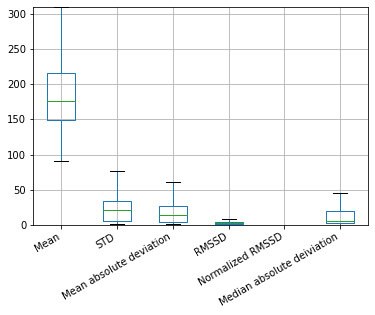

In [27]:
fig, ax = plt.subplots()
box = df.boxplot(column=['Mean', 'STD', 'Mean absolute deviation', 'RMSSD', 'Normalized RMSSD', 'Median absolute deiviation'], ax=ax, sym='', figsize=(4,3)) 
ax.margins(y=0)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

### (6.2) Scores

In [28]:
print(f"SVM Scores: {pipeline_svm.score(X_test, y_test)}")
print()
print(f"Decision tree Scores: {pipeline_dt.score(X_test, y_test)}")
print()
print(f"Random forest: {pipeline_rf.score(X_test, y_test)}")
print()
print(f"Stacking classifier Scores: {clf.score(X_test, y_test)}")
print()
print(f"xgboost Scores: {xgb_model.score(X_test, y_test)}")
print()
print(f"AdaBoost Scores: {adaBoost_clf.score(X_test, y_test)}")
print("-------------------------------(Testing scores above)------------------------------------------------------")
print("-----------------------------------------------------------------------------------------------------------")
print("-------------------------------(Training scores below)-----------------------------------------------------")
print(f"SVM Scores: {pipeline_svm.score(X_train, y_train)}")
print()
print(f"Decision tree Scores: {pipeline_dt.score(X_train, y_train)}")
print()
print(f"Random forest: {pipeline_rf.score(X_train, y_train)}")
print()
print(f"Stacking classifier Scores: {clf.score(X_train, y_train)}")
print()
print(f"xgboost Scores: {xgb_model.score(X_train, y_train)}")
print()
print(f"AdaBoost Scores: {adaBoost_clf.score(X_train, y_train)}")

SVM Scores: 0.9684491978609626

Decision tree Scores: 0.8983957219251337

Random forest: 0.8935828877005347

Stacking classifier Scores: 0.879144385026738

xgboost Scores: 0.818716577540107

AdaBoost Scores: 0.9310160427807487
-------------------------------(Testing scores above)------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-------------------------------(Training scores below)-----------------------------------------------------
SVM Scores: 0.9411350372308311

Decision tree Scores: 0.9922519621654257

Random forest: 1.0

Stacking classifier Scores: 0.9998993761320185

xgboost Scores: 0.9990943851881666

AdaBoost Scores: 0.9643791507345543


### (6.3) Evaluate on addtional Databases (Normal Sinus Rhythm Database and Arrhythmia)

In [29]:
print("-------------------------------(Testing scores below for Normal sinus Rhythm DB)-----------------------------------------------")
print(f"SVM: {pipeline_svm.score(X_nsr, y_nsr)}")
print(f"DT: {pipeline_dt.score(X_nsr, y_nsr)}")
print(f"RF: {pipeline_rf.score(X_nsr, y_nsr)}")
print(f"Stacking: {clf.score(X_nsr, y_nsr)}")
print(f"Xgbost: {xgb_model.score(X_nsr, y_nsr)}")
print(f"AdaBoost: {adaBoost_clf.score(X_nsr, y_nsr)}")
print()
print()
print("-------------------------------(Testing scores below for Arrhythmia DB)-----------------------------------------------")
print(f"SVM: {pipeline_svm.score(X_A, y_A)}")
print(f"DT: {pipeline_dt.score(X_A, y_A)}")
print(f"RF: {pipeline_rf.score(X_A, y_A)}")
print(f"Stacking: {clf.score(X_A, y_A)}")
print(f"Xgbost: {xgb_model.score(X_A, y_A)}")
print(f"AdaBoost: {adaBoost_clf.score(X_A, y_A)}")

-------------------------------(Testing scores below for Normal sinus Rhythm DB)-----------------------------------------------
SVM: 0.9668249593198951
DT: 0.9470328429581908
RF: 0.9670574170623983
Stacking: 0.9710424069338823
Xgbost: 0.9622090127187594
AdaBoost: 0.9661275860923854


-------------------------------(Testing scores below for Arrhythmia DB)-----------------------------------------------
SVM: 0.3953488372093023
DT: 0.9302325581395349
RF: 0.9302325581395349
Stacking: 0.8372093023255814
Xgbost: 0.9302325581395349
AdaBoost: 0.813953488372093


### (6.4) F1-score and Precision recall curve

In [30]:
from sklearn.metrics import f1_score

In [31]:
y_pred_svm = pipeline_svm.predict(X_test)
y_pred_dt = pipeline_dt.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_stacking = clf.predict(X_test)
y_pred_xgboost = xgb_model.predict(X_test)
y_pred_adaboost = adaBoost_clf.predict(X_test)

In [105]:
svm_f1 = f1_score(y_test, y_pred_svm)
dt_f1 = f1_score(y_test, y_pred_dt)
rf_f1 = f1_score(y_test, y_pred_rf)
stacking_f1 = f1_score(y_test, y_pred_stacking)
xgboost_f1 = f1_score(y_test, y_pred_xgboost)
adaboost_f1 = f1_score(y_test, y_pred_adaboost)

print("SVM f1 score: ", svm_f1)
print("DT f1 score: ", dt_f1)
print("RF f1 score: ", rf_f1)
print("Stacking f1 score: ", stacking_f1)
print("Xgboost f1 score: ", xgboost_f1)
print("Adaboost f1 score: ", adaboost_f1)

SVM f1 score:  0.9370330843116329
DT f1 score:  0.76010101010101
RF f1 score:  0.7445442875481387
Stacking f1 score:  0.696236559139785
Xgboost f1 score:  0.46275752773375595
Adaboost f1 score:  0.8614393125671321


In [34]:
from sklearn.metrics import classification_report

In [42]:
target_names = ['class 0', 'class 1'] # class 0 = Normal rythm, class 1 = AFIB
print("SVM below:")
print(classification_report(y_test, y_pred_svm, target_names=target_names))
print("DT below:")
print(classification_report(y_test, y_pred_dt, target_names=target_names))
print("RF below:")
print(classification_report(y_test, y_pred_rf, target_names=target_names))
print("Stacking below:")
print(classification_report(y_test, y_pred_stacking, target_names=target_names))
print("Xgboost below:")
print(classification_report(y_test, y_pred_xgboost, target_names=target_names))
print("Adaboost below:")
print(classification_report(y_test, y_pred_adaboost, target_names=target_names))

SVM below:
              precision    recall  f1-score   support

     class 0       0.98      0.98      0.98      1401
     class 1       0.94      0.94      0.94       469

    accuracy                           0.97      1870
   macro avg       0.96      0.96      0.96      1870
weighted avg       0.97      0.97      0.97      1870

DT below:
              precision    recall  f1-score   support

     class 0       0.89      0.98      0.94      1401
     class 1       0.93      0.64      0.76       469

    accuracy                           0.90      1870
   macro avg       0.91      0.81      0.85      1870
weighted avg       0.90      0.90      0.89      1870

RF below:
              precision    recall  f1-score   support

     class 0       0.89      0.99      0.93      1401
     class 1       0.94      0.62      0.74       469

    accuracy                           0.89      1870
   macro avg       0.91      0.80      0.84      1870
weighted avg       0.90      0.89      0.89

In [49]:
from sklearn.metrics import precision_recall_curve

In [101]:
y_score_svm = pipeline_svm.predict_proba(X_test)[:, 1]
y_score_dt = pipeline_dt.predict_proba(X_test)[:, 1]
y_score_rf = pipeline_rf.predict_proba(X_test)[:, 1]

y_score_stacking = clf.predict_proba(X_test)[:, 1]
y_score_xgboost = xgb_model.predict_proba(X_test)[:, 1]
y_score_adaboost = adaBoost_clf.predict_proba(X_test)[:, 1]

In [102]:
precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_test, y_score_svm)
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_test, y_score_dt)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_score_rf)

precision_stacking, recall_stacking, thresholds_stacking = precision_recall_curve(y_test, y_score_stacking)
precision_xgboost, recall_xgboost, thresholds_xgboost = precision_recall_curve(y_test, y_score_xgboost)
precision_adaboost, recall_adaboost, thresholds_adaboost = precision_recall_curve(y_test, y_score_adaboost)

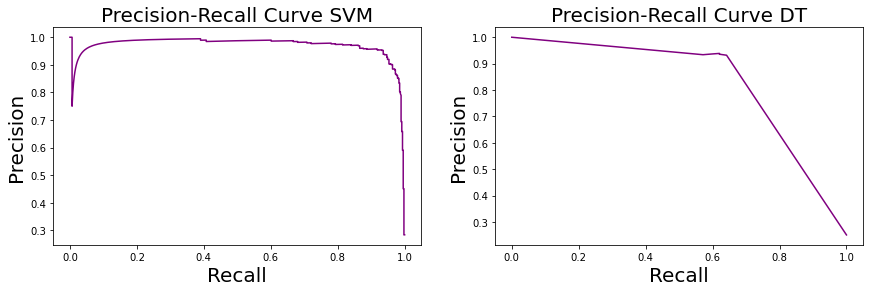

In [96]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(recall_svm, precision_svm, color='purple')
ax1.set_title('Precision-Recall Curve SVM', fontsize=20)
ax1.set_ylabel('Precision', fontsize=20)
ax1.set_xlabel('Recall', fontsize=20)

plt.subplots_adjust(right = 2)

ax2.plot(recall_dt, precision_dt, color='purple')
ax2.set_title('Precision-Recall Curve DT', fontsize=20)
ax2.set_ylabel('Precision', fontsize=20)
ax2.set_xlabel('Recall', fontsize=20)
plt.show()

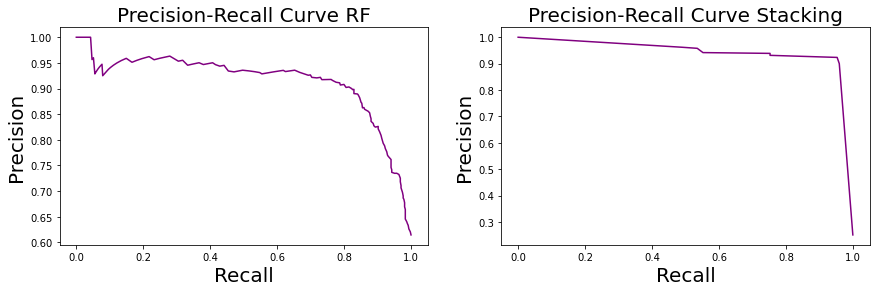

In [99]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(recall_rf, precision_rf, color='purple')
ax1.set_title('Precision-Recall Curve RF', fontsize=20)
ax1.set_ylabel('Precision', fontsize=20)
ax1.set_xlabel('Recall', fontsize=20)

plt.subplots_adjust(right = 2)

ax2.plot(recall_stacking, precision_stacking, color='purple')
ax2.set_title('Precision-Recall Curve Stacking', fontsize=20)
ax2.set_ylabel('Precision', fontsize=20)
ax2.set_xlabel('Recall', fontsize=20)
plt.show()

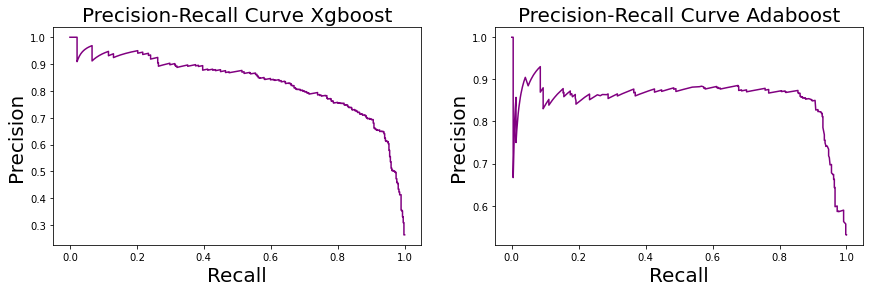

In [103]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(recall_xgboost, precision_xgboost, color='purple')
ax1.set_title('Precision-Recall Curve Xgboost', fontsize=20)
ax1.set_ylabel('Precision', fontsize=20)
ax1.set_xlabel('Recall', fontsize=20)

plt.subplots_adjust(right = 2)

ax2.plot(recall_adaboost, precision_adaboost, color='purple')
ax2.set_title('Precision-Recall Curve Adaboost', fontsize=20)
ax2.set_ylabel('Precision', fontsize=20)
ax2.set_xlabel('Recall', fontsize=20)
plt.show()

# (7) RESULTS FOR SEGMENT LENGTH = 20

### (7.1) Feature results

In [26]:
df = pd.DataFrame(all_features_train)
df

,Mean,STD,RMSSD,Normalized RMSSD,Shannon Entropy,Mean absolute deviation,Median absolute deiviation
0,168.25,43.226,1.215,0.007,1.000,39.700,27.5
1,169.10,50.353,1.227,0.007,0.977,47.210,55.0
2,150.75,62.874,1.820,0.012,0.977,50.850,29.0
3,194.20,32.262,1.132,0.006,0.931,27.120,17.0
4,169.85,43.731,1.104,0.006,0.977,41.550,37.5
...,...,...,...,...,...,...,...
29811,187.10,22.816,0.631,0.003,0.931,19.590,19.0
29812,192.05,35.712,1.425,0.007,0.954,26.860,16.0
29813,174.05,33.203,1.075,0.006,0.977,26.555,20.0
29814,171.60,25.346,0.987,0.006,0.977,22.900,23.0


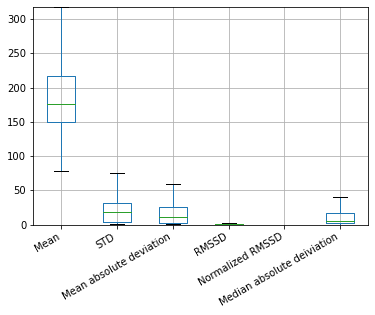

In [27]:
fig, ax = plt.subplots()
box = df.boxplot(column=['Mean', 'STD', 'Mean absolute deviation', 'RMSSD', 'Normalized RMSSD', 'Median absolute deiviation'], ax=ax, sym='', figsize=(4,3)) 
ax.margins(y=0)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

### (7.2) Scores

In [28]:
print(f"SVM Scores: {pipeline_svm.score(X_test, y_test)}")
print()
print(f"Decision tree Scores: {pipeline_dt.score(X_test, y_test)}")
print()
print(f"Random forest: {pipeline_rf.score(X_test, y_test)}")
print()
print(f"Stacking classifier Scores: {clf.score(X_test, y_test)}")
print()
print(f"xgboost Scores: {xgb_model.score(X_test, y_test)}")
print()
print(f"AdaBoost Scores: {adaBoost_clf.score(X_test, y_test)}")
print("-------------------------------(Testing scores above)------------------------------------------------------")
print("-----------------------------------------------------------------------------------------------------------")
print("-------------------------------(Training scores below)-----------------------------------------------------")
print(f"SVM Scores: {pipeline_svm.score(X_train, y_train)}")
print()
print(f"Decision tree Scores: {pipeline_dt.score(X_train, y_train)}")
print()
print(f"Random forest: {pipeline_rf.score(X_train, y_train)}")
print()
print(f"Stacking classifier Scores: {clf.score(X_train, y_train)}")
print()
print(f"xgboost Scores: {xgb_model.score(X_train, y_train)}")
print()
print(f"AdaBoost Scores: {adaBoost_clf.score(X_train, y_train)}")

SVM Scores: 0.9319315751960086

Decision tree Scores: 0.8877405559515325

Random forest: 0.8455096222380613

Stacking classifier Scores: 0.9158945117605132

xgboost Scores: 0.7888453314326443

AdaBoost Scores: 0.8663578047042053
-------------------------------(Testing scores above)------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-------------------------------(Training scores below)-----------------------------------------------------
SVM Scores: 0.9278575261604508

Decision tree Scores: 0.9789039441910383

Random forest: 1.0

Stacking classifier Scores: 0.9828280118057419

xgboost Scores: 0.9847732760933727

AdaBoost Scores: 0.9456332170646633


### (7.3) Evaluate on addtional Databases (Normal Sinus Rhythm Database and Arrhythmia)

In [29]:
print("-------------------------------(Testing scores below for Normal sinus Rhythm DB)-----------------------------------------------")
print(f"SVM: {pipeline_svm.score(X_nsr, y_nsr)}")
print(f"DT: {pipeline_dt.score(X_nsr, y_nsr)}")
print(f"RF: {pipeline_rf.score(X_nsr, y_nsr)}")
print(f"Stacking: {clf.score(X_nsr, y_nsr)}")
print(f"Xgbost: {xgb_model.score(X_nsr, y_nsr)}")
print(f"AdaBoost: {adaBoost_clf.score(X_nsr, y_nsr)}")
print()
print()
print("-------------------------------(Testing scores below for Arrhythmia DB)-----------------------------------------------")
print(f"SVM: {pipeline_svm.score(X_A, y_A)}")
print(f"DT: {pipeline_dt.score(X_A, y_A)}")
print(f"RF: {pipeline_rf.score(X_A, y_A)}")
print(f"Stacking: {clf.score(X_A, y_A)}")
print(f"Xgbost: {xgb_model.score(X_A, y_A)}")
print(f"AdaBoost: {adaBoost_clf.score(X_A, y_A)}")

-------------------------------(Testing scores below for Normal sinus Rhythm DB)-----------------------------------------------
SVM: 0.9454720552585262
DT: 0.9014932642601755
RF: 0.9414870653870422
Stacking: 0.9496784334562038
Xgbost: 0.9418634255415712
AdaBoost: 0.9213628665360476


-------------------------------(Testing scores below for Arrhythmia DB)-----------------------------------------------
SVM: 0.5267175572519084
DT: 0.8931297709923665
RF: 0.7862595419847328
Stacking: 0.8778625954198473
Xgbost: 0.7709923664122137
AdaBoost: 0.9694656488549618


### (7.4) F1-score and Precision recall curve

In [30]:
from sklearn.metrics import f1_score

In [31]:
y_pred_svm = pipeline_svm.predict(X_test)
y_pred_dt = pipeline_dt.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_stacking = clf.predict(X_test)
y_pred_xgboost = xgb_model.predict(X_test)
y_pred_adaboost = adaBoost_clf.predict(X_test)

In [32]:
svm_f1 = f1_score(y_test, y_pred_svm)
dt_f1 = f1_score(y_test, y_pred_dt)
rf_f1 = f1_score(y_test, y_pred_rf)
stacking_f1 = f1_score(y_test, y_pred_stacking)
xgboost_f1 = f1_score(y_test, y_pred_xgboost)
adaboost_f1 = f1_score(y_test, y_pred_adaboost)

print("SVM f1 score: ", svm_f1)
print("DT f1 score: ", dt_f1)
print("RF f1 score: ", rf_f1)
print("Stacking f1 score: ", stacking_f1)
print("Xgboost f1 score: ", xgboost_f1)
print("Adaboost f1 score: ", adaboost_f1)

SVM f1 score:  0.8722408026755852
DT f1 score:  0.7730547550432276
RF f1 score:  0.6110363391655451
Stacking f1 score:  0.8284883720930233
Xgboost f1 score:  0.32861189801699714
Adaboost f1 score:  0.693126022913257


In [33]:
from sklearn.metrics import classification_report

In [34]:
target_names = ['class 0', 'class 1'] # class 0 = Normal rythm, class 1 = AFIB
print("SVM below:")
print(classification_report(y_test, y_pred_svm, target_names=target_names))
print("DT below:")
print(classification_report(y_test, y_pred_dt, target_names=target_names))
print("RF below:")
print(classification_report(y_test, y_pred_rf, target_names=target_names))
print("Stacking below:")
print(classification_report(y_test, y_pred_stacking, target_names=target_names))
print("Xgboost below:")
print(classification_report(y_test, y_pred_xgboost, target_names=target_names))
print("Adaboost below:")
print(classification_report(y_test, y_pred_adaboost, target_names=target_names))

SVM below:
              precision    recall  f1-score   support

     class 0       0.97      0.93      0.95      4204
     class 1       0.82      0.93      0.87      1408

    accuracy                           0.93      5612
   macro avg       0.90      0.93      0.91      5612
weighted avg       0.94      0.93      0.93      5612

DT below:
              precision    recall  f1-score   support

     class 0       0.92      0.93      0.93      4204
     class 1       0.78      0.76      0.77      1408

    accuracy                           0.89      5612
   macro avg       0.85      0.85      0.85      5612
weighted avg       0.89      0.89      0.89      5612

RF below:
              precision    recall  f1-score   support

     class 0       0.85      0.97      0.90      4204
     class 1       0.83      0.48      0.61      1408

    accuracy                           0.85      5612
   macro avg       0.84      0.73      0.76      5612
weighted avg       0.84      0.85      0.83

In [35]:
from sklearn.metrics import precision_recall_curve

In [36]:
y_score_svm = pipeline_svm.predict_proba(X_test)[:, 1]
y_score_dt = pipeline_dt.predict_proba(X_test)[:, 1]
y_score_rf = pipeline_rf.predict_proba(X_test)[:, 1]

y_score_stacking = clf.predict_proba(X_test)[:, 1]
y_score_xgboost = xgb_model.predict_proba(X_test)[:, 1]
y_score_adaboost = adaBoost_clf.predict_proba(X_test)[:, 1]

In [37]:
precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_test, y_score_svm)
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_test, y_score_dt)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_score_rf)

precision_stacking, recall_stacking, thresholds_stacking = precision_recall_curve(y_test, y_score_stacking)
precision_xgboost, recall_xgboost, thresholds_xgboost = precision_recall_curve(y_test, y_score_xgboost)
precision_adaboost, recall_adaboost, thresholds_adaboost = precision_recall_curve(y_test, y_score_adaboost)

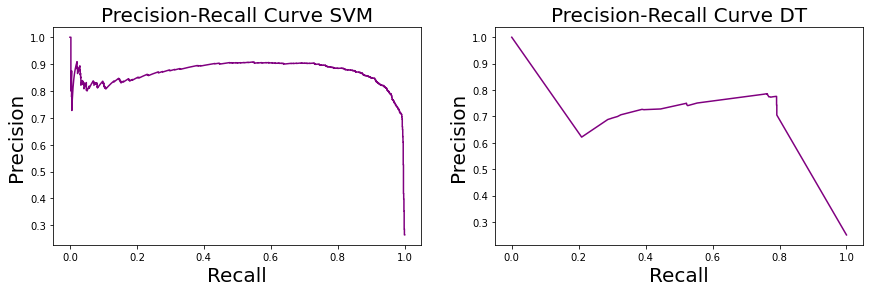

In [38]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(recall_svm, precision_svm, color='purple')
ax1.set_title('Precision-Recall Curve SVM', fontsize=20)
ax1.set_ylabel('Precision', fontsize=20)
ax1.set_xlabel('Recall', fontsize=20)

plt.subplots_adjust(right = 2)

ax2.plot(recall_dt, precision_dt, color='purple')
ax2.set_title('Precision-Recall Curve DT', fontsize=20)
ax2.set_ylabel('Precision', fontsize=20)
ax2.set_xlabel('Recall', fontsize=20)
plt.show()

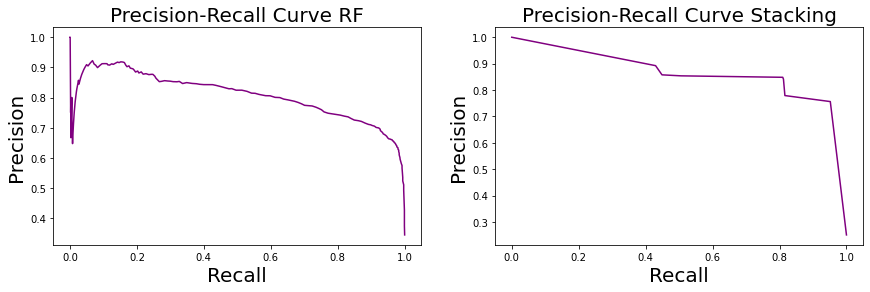

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(recall_rf, precision_rf, color='purple')
ax1.set_title('Precision-Recall Curve RF', fontsize=20)
ax1.set_ylabel('Precision', fontsize=20)
ax1.set_xlabel('Recall', fontsize=20)

plt.subplots_adjust(right = 2)

ax2.plot(recall_stacking, precision_stacking, color='purple')
ax2.set_title('Precision-Recall Curve Stacking', fontsize=20)
ax2.set_ylabel('Precision', fontsize=20)
ax2.set_xlabel('Recall', fontsize=20)
plt.show()

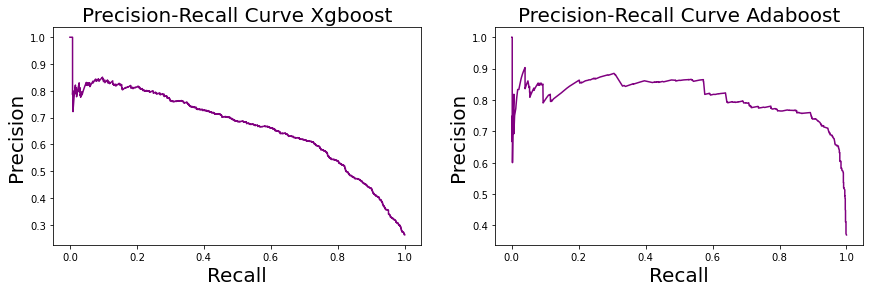

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(recall_xgboost, precision_xgboost, color='purple')
ax1.set_title('Precision-Recall Curve Xgboost', fontsize=20)
ax1.set_ylabel('Precision', fontsize=20)
ax1.set_xlabel('Recall', fontsize=20)

plt.subplots_adjust(right = 2)

ax2.plot(recall_adaboost, precision_adaboost, color='purple')
ax2.set_title('Precision-Recall Curve Adaboost', fontsize=20)
ax2.set_ylabel('Precision', fontsize=20)
ax2.set_xlabel('Recall', fontsize=20)
plt.show()